In [1]:
res1 = None
res2 = None

In [8]:
import scipy.optimize as solve
import time


c = [0.2, 0.3]
A = [[-7, -3], [-5, -4], [-9, -2]]
b = [-1100, -1900, -700]

start = time.time()
x0_bounds = (0, None)
x1_bounds = (0, None)
res = solve.linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print(res)
print(res.fun)
print(res.x)
stop = time.time()
print('Time: ', stop - start)

res1 = res.x

     con: array([], dtype=float64)
     fun: 76.00000002591446
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([1.56000000e+03, 5.74134447e-08, 2.72000000e+03])
  status: 0
 success: True
       x: array([3.8000000e+02, 1.6869936e-07])
76.00000002591446
[3.8000000e+02 1.6869936e-07]
Time:  0.018003463745117188


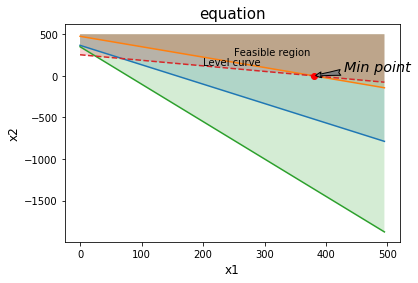

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def f(a1, a2, b, x):
    return (b - a1 * x) / a2


X_MAX = 500
STEP = int(X_MAX / 100)
x = np.arange(0, X_MAX, STEP)
for i in range(len(A)):
    y = f(b=b[i], a1=A[i][0], x=x, a2=A[i][1])
    plt.plot(x, y)
    plt.fill_between(x, y, X_MAX, alpha=0.2)

plt.text(200, 125, 'Level curve')
y = (c[0] * res.x[0] - c[0] * x) / c[1]
plt.plot(x, y, '--')
plt.fill_between(x, y, X_MAX, alpha=0.2)

plt.annotate('Min point', xy=(res.x[0], res.x[1]), xytext=(res.x[0] + 50, res.x[1] + 50), size='x-large',
             style='italic', arrowprops=dict(facecolor='gray', arrowstyle='fancy'))
plt.plot(res.x[0], res.x[1], 'ro')

plt.text(X_MAX/2, X_MAX/2, 'Feasible region')

plt.title('equation', fontsize=15)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12, color='black')
plt.savefig('paint.png', dpi=300)
plt.show()

In [4]:
from pulp import *
start = time.time()
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

problem = pulp.LpProblem('0', LpMinimize)
problem += 0.2 * x1 + 0.3 * x2, 'F(x)'
problem += 7 * x1 + 3 * x2 >= 1100, 'condition 1'
problem += 5 * x1 + 4 * x2 >= 1900, 'condition 2'
problem += 9 * x1 + 2 * x2 >= 700, 'condition 3'
problem.solve()

res = list()
print('Results: ')
for v in problem.variables():
    print(v.name, '=', v.varValue)
    res.append(v.varValue)
print('Income: ', value(problem.objective))
stop = time.time()
print('Time: ', stop - start)

res2 = res

Results: 
x1 = 380.0
x2 = 0.0
Income:  76.0
Time:  0.1249997615814209


In [5]:
print('Solution results: ')
print('scipy.optimize result: ', res1)
print('pulp result: ', res2)
print('np.allclose: ', np.allclose(np.array(res1), np.array(res2)))
print('np.allclose [0]: ', np.allclose(np.array(res1[0]), np.array(res2[0])))
print('np.allclose [1]:', np.allclose(np.array(res1[1]), np.array(res2[1])))

Solution results: 
scipy.optimize result:  [3.8000000e+02 1.6869936e-07]
pulp result:  [380.0, 0.0]
np.allclose:  False
np.allclose [0]:  True
np.allclose [1]: False


In [10]:
import numpy as np
from scipy.optimize import linprog
import time


start = time.time()
c = [12, 8, 7, 10, 9, 4, 5, 11, 3, 14, 15, 10, 6, 5, 9, 16, 8, 6, 4, 5]
aa = np.zeros(180, dtype=int)
a = aa.reshape(9, 20)
a[0, 0:5] = 1
a[1, 5:10] = 1
a[2, 10:15] = 1
a[3, 15:20] = 1
a[4, 0::5] = 1
a[5, 1::5] = 1
a[6, 2::5] = 1
a[7, 3::5] = 1
a[8, 4::5] = 1
A = a
b = [85, 110, 65, 80, 90, 70, 70, 60, 50]
bnd = [(0, int(1000))] * 20
res = linprog(c, A_eq=A, b_eq=b, bounds=bnd)
print(res.x.reshape(4, 5).round())
print(res.fun)
stop = time.time()
print('Time: ', stop - start)

[[ 0. 60. 25.  0.  0.]
 [90. 10.  0. 10.  0.]
 [ 0.  0. 45. 20.  0.]
 [ 0.  0.  0. 30. 50.]]
1835.0000041123596
Time:  0.020000457763671875


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
